In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
import urllib.request as urllib
import json

Composting Services

In [171]:
url = 'https://data.cityofnewyork.us/resource/rbfe-xwgv.csv'
compost_participation = pd.read_csv(url)
compost_participation.head()

,community_district,district_currently_eligible,district_currently_receiving,total_number_of_addresses,total_number_of_households,total_number_of_interested,percent_of_interested,total_number_of_addresses_1,percent_of_addresses_receiving,total_number_of_addresses_2,...,total_number_of_addresses_3,percent_of_addresses_not,total_number_of_interested_1,percent_of_interested_1,total_number_households,percent_of_households,total_number_of_households_1,percent_of_households_waiting,total_number_of_households_2,percent_of_households_not
0,BK01,True,True,14904,92610,2136,0.143,"1,734",11.6%,2,...,400.0,2.7%,26909,0.291,"9,745",10.5%,10,0.01%,400,0.4%
1,BK02,True,True,8205,70151,2168,0.264,"1,819",22.2%,0,...,349.0,4.3%,39144,0.558,"14,585",20.8%,0,0,349,0.5%
2,BK03,False,False,16865,73568,1665,0.099,NaN,NaN,NaN,...,NaN,NaN,9521,0.129,NaN,NaN,NaN,NaN,NaN,NaN
3,BK04,False,False,11183,45324,920,0.082,NaN,NaN,NaN,...,NaN,NaN,6915,0.153,NaN,NaN,NaN,NaN,NaN,NaN
4,BK05,False,False,20970,67699,147,0.007,NaN,NaN,NaN,...,NaN,NaN,1697,0.025,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
#lots of interesting variables but really the most relevant one is the % of households receiving compost service. If we found that this was a good predictor, we could come back 
#to this dataset to make recommendations about where to expand curbside composting
#anyway, let's drop all columns except total # of households and % households receiving compost service
c_compost_participation = compost_participation[['community_district','total_number_of_households','total_number_households','percent_of_households']]
c_compost_participation.rename({'total_number_households':'hh_compost_num','percent_of_households':'hh_compost_percent'},axis = 1, inplace=True)
c_compost_participation.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,community_district,total_number_of_households,hh_compost_num,hh_compost_percent
0,BK01,92610,"9,745",10.5%
1,BK02,70151,"14,585",20.8%
2,BK03,73568,NaN,NaN
3,BK04,45324,NaN,NaN
4,BK05,67699,NaN,NaN


In [173]:
#SI01 community district shows as "SI01**". Get rid of the asterisks
c_compost_participation.community_district.replace('SI01**','SI01',inplace=True)

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [174]:
#recast to numeric data types
c_compost_participation['hh_compost_num'] = c_compost_participation['hh_compost_num'].str.replace(',','').fillna(0).astype(int)
c_compost_participation['hh_compost_percent'] = c_compost_participation['hh_compost_num'] / c_compost_participation['total_number_of_households']
c_compost_participation.head()

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/2605141374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_compost_participation['hh_compost_num'] = c_compost_participation['hh_compost_num'].str.replace(',','').fillna(0).astype(int)
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/2605141374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_compost_participation['hh_compost_percent'] = c_compost_participation['hh_compost_num'] / c_compost_participation['total_number_of_households']


,community_district,total_number_of_households,hh_compost_num,hh_compost_percent
0,BK01,92610,9745,0.105226
1,BK02,70151,14585,0.207909
2,BK03,73568,0,0.000000
3,BK04,45324,0,0.000000
4,BK05,67699,0,0.000000


Waste collection frequency

In [108]:
dsny_freq = gpd.read_file(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\DSNY Frequencies.geojson')
dsny_freq.head()

,freq_recycling,fid,shape_area,globalid,section,shape_length,freq_bulk,schedulecode,frequency,district,freq_refuse,geometry
0,Wed,198,0.00011641886090798209,{AE2BAA14-A768-4D33-A1AF-5B482700D1FB},BKN052,0.06516967212230944,"Wed, Sat",3052E,E,BKN05,"Wed, Sat","MULTIPOLYGON (((-73.87160 40.67414, -73.87171 ..."
1,Tue,197,0.00009331906390565516,{DC6C0210-D301-4492-B5CF-6B12E8BB7767},BKN052,0.06287776322531924,"Tue, Fri",3052D,D,BKN05,"Tue, Fri","MULTIPOLYGON (((-73.86331 40.67533, -73.86420 ..."
2,Mon,196,0.0000966830086671063,{40428D77-585C-4AA8-8933-D9C385CAD11D},BKN052,0.05939975579981378,"Mon, Thu",3052C,C,BKN05,"Mon, Thu","MULTIPOLYGON (((-73.86331 40.67533, -73.86352 ..."
3,Wed,195,0.00008127775738872484,{6689232F-8F14-4402-9FC7-BD5D13DECC82},BKN051,0.04086432427122901,"Wed, Sat",3051E,E,BKN05,"Wed, Sat","MULTIPOLYGON (((-73.88470 40.67224, -73.88476 ..."
4,Tue,194,0.00008967953262201466,{750BA783-A7A1-4994-9A38-36108E4099B5},BKN051,0.03942007437744675,"Tue, Fri",3051D,D,BKN05,"Tue, Fri","MULTIPOLYGON (((-73.89240 40.66980, -73.89247 ..."


<AxesSubplot:>

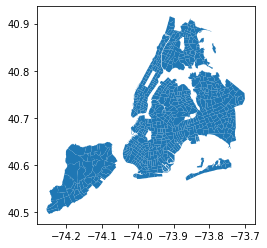

In [109]:
dsny_freq.plot()

In [116]:
#let's aggregate this to the DSNY section level (it's currently at the route/schedule level), but we have frequencies listed by DOW. Let's get these as weekly freq
dsny_freq['wfr_recycling'] = dsny_freq['freq_recycling'].str.replace(', ','').str.len() / 3
dsny_freq['wfr_refuse'] = dsny_freq['freq_refuse'].str.replace(', ','').str.len() / 3
dsny_freq['wfr_bulk'] = dsny_freq['freq_bulk'].str.replace(', ','').str.len() / 3

#use weighted average of collection frequency by land area - scale the freq by land area before dissolving/aggregating
dsny_freq['shape_area'] = dsny_freq['shape_area'].astype(float)
dsny_freq['wfr_recycling_wt'] = dsny_freq['wfr_recycling'] * dsny_freq['shape_area']
dsny_freq['wfr_refuse_wt'] = dsny_freq['wfr_refuse'] * dsny_freq['shape_area']
dsny_freq['wfr_bulk_wt'] = dsny_freq['wfr_bulk'] * dsny_freq['shape_area']

In [145]:
#now dissolve and use the weighted average of collection frequency by land area
dsny_freq_sct = dsny_freq[['section','wfr_recycling_wt','wfr_refuse_wt','wfr_bulk_wt','shape_area','geometry']].dissolve(by = 'section',aggfunc='sum')
dsny_freq_sct.head()

,geometry,wfr_recycling_wt,wfr_refuse_wt,wfr_bulk_wt,shape_area
section,,,,,
BKN011,"POLYGON ((-73.94063 40.73316, -73.94059 40.733...",0.000302,0.000905,0.000905,0.000302
BKN012,"POLYGON ((-73.95430 40.71401, -73.95430 40.714...",0.000195,0.000585,0.000585,0.000195
BKN013,"MULTIPOLYGON (((-73.92410 40.71768, -73.92409 ...",0.000342,0.001027,0.001027,0.000342
BKN014,"POLYGON ((-73.95396 40.70699, -73.95388 40.706...",0.000183,0.000548,0.000548,0.000183
BKN015,"POLYGON ((-73.93270 40.70318, -73.93352 40.702...",0.000285,0.000856,0.000856,0.000285


In [146]:
#calculate weighted average frequency by section
dsny_freq_sct['wfr_avg_recycling'] = dsny_freq_sct['wfr_recycling_wt'] / dsny_freq_sct['shape_area']
dsny_freq_sct['wfr_avg_refuse'] = dsny_freq_sct['wfr_refuse_wt'] / dsny_freq_sct['shape_area']
dsny_freq_sct['wfr_avg_bulk'] = dsny_freq_sct['wfr_bulk_wt'] / dsny_freq_sct['shape_area']

#drop irrelevant columns
dsny_freq_sct.drop(['wfr_recycling_wt','wfr_refuse_wt','wfr_bulk_wt'],axis = 1,inplace = True)

#recreate CD column
dsny_freq_sct['CD'] = dsny_freq_sct.index.str[:-1]

dsny_freq_sct.head()

,geometry,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,CD
section,,,,,,
BKN011,"POLYGON ((-73.94063 40.73316, -73.94059 40.733...",0.000302,1.0,3.0,3.0,BKN01
BKN012,"POLYGON ((-73.95430 40.71401, -73.95430 40.714...",0.000195,1.0,3.0,3.0,BKN01
BKN013,"MULTIPOLYGON (((-73.92410 40.71768, -73.92409 ...",0.000342,1.0,3.0,3.0,BKN01
BKN014,"POLYGON ((-73.95396 40.70699, -73.95388 40.706...",0.000183,1.0,3.0,3.0,BKN01
BKN015,"POLYGON ((-73.93270 40.70318, -73.93352 40.702...",0.000285,1.0,3.0,3.0,BKN01


Litter Baskets

In [21]:
url = 'https://data.cityofnewyork.us/resource/8znf-7b2c.geojson'
litter_baskets = gpd.read_file(url)
litter_baskets.head()

,basketid,stateplane_labelx,fid,baskettype,streetname2,direction,stateplane_snappedx,section,stateplane_snappedy,ownertype,stateplane_labely,location_description,streetname1,geometry
0,41110005,1044426.25529157,11780,H,201 ST,SW,1044505.56845315,QE111,215527.9613823,D,215478.47263613,SW corner of 43 AV and 201 ST,43 AV,POINT (-73.78279 40.75792)
1,40550023,1031043.45200473,11626,S,None,None,None,QW055,None,D,199889.96772397,None,None,POINT (-73.83120 40.71521)
2,20710098,1010862.0481419,9751,H,None,None,None,BX071,None,P,255751.72050154,None,None,POINT (-73.90378 40.86862)
3,10330064,988127.56769231,8374,H,E 2 ST,SW,988163.20082314,MN033,202681.24166897,D,202666.06945522,SW corner of AV A and E 2 ST,AV A,POINT (-73.98601 40.72296)
4,10630210,992970.35754739,4358,S,E 45 ST,NW,992976.22925481,MN063,212831.07996506,D,212871.83742946,NW corner of 1 AV and E 45 ST,1 AV,POINT (-73.96853 40.75096)


<AxesSubplot:>

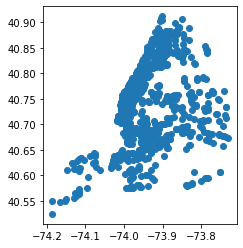

In [22]:
litter_baskets.plot()

In [155]:
#groupby dsny section
litter_baskets_sct = litter_baskets.pivot_table(index = 'section',columns='baskettype',values = 'basketid', aggfunc = 'count').fillna(0)
litter_baskets_sct['total_litter_baskets'] = litter_baskets_sct.C + litter_baskets_sct.E + litter_baskets_sct.H + litter_baskets_sct.R + litter_baskets_sct.S
litter_baskets_sct.rename({'C':'bigbelly','E':'seasonal_wire_litter_basket','H':'highend_basket','R':'publicspacereceptacle','S':'wire_basket'}, axis = 1,inplace= True)
litter_baskets_sct


baskettype,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets
section,,,,,,
BKN011,1.0,0.0,0.0,1.0,0.0,2.0
BKN012,0.0,0.0,0.0,0.0,1.0,1.0
BKN014,0.0,0.0,0.0,0.0,2.0,2.0
BKN015,0.0,0.0,2.0,0.0,7.0,9.0
BKN021,3.0,0.0,4.0,1.0,4.0,12.0
...,...,...,...,...,...,...
SI031,0.0,0.0,0.0,1.0,1.0,2.0
SI032,0.0,0.0,0.0,0.0,2.0,2.0
SI033,0.0,0.0,0.0,0.0,2.0,2.0


In [157]:
#merge with the collection frequency dataframe
sct = dsny_freq_sct.merge(litter_baskets_sct, how= 'left', left_index = True, right_index = True)
sct

,geometry,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,CD,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets
section,,,,,,,,,,,,
BKN011,"POLYGON ((-73.94063 40.73316, -73.94059 40.733...",0.000302,1.0,3.0,3.0,BKN01,1.0,0.0,0.0,1.0,0.0,2.0
BKN012,"POLYGON ((-73.95430 40.71401, -73.95430 40.714...",0.000195,1.0,3.0,3.0,BKN01,0.0,0.0,0.0,0.0,1.0,1.0
BKN013,"MULTIPOLYGON (((-73.92410 40.71768, -73.92409 ...",0.000342,1.0,3.0,3.0,BKN01,NaN,NaN,NaN,NaN,NaN,NaN
BKN014,"POLYGON ((-73.95396 40.70699, -73.95388 40.706...",0.000183,1.0,3.0,3.0,BKN01,0.0,0.0,0.0,0.0,2.0,2.0
BKN015,"POLYGON ((-73.93270 40.70318, -73.93352 40.702...",0.000285,1.0,3.0,3.0,BKN01,0.0,0.0,2.0,0.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
SI034,"POLYGON ((-74.16102 40.53979, -74.16099 40.539...",0.000493,1.0,2.0,2.0,SI03,NaN,NaN,NaN,NaN,NaN,NaN
SI035,"POLYGON ((-74.18159 40.54586, -74.18209 40.545...",0.000975,1.0,2.0,2.0,SI03,0.0,0.0,0.0,0.0,1.0,1.0
SI036,"POLYGON ((-74.19717 40.54317, -74.19717 40.543...",0.001220,1.0,2.0,2.0,SI03,NaN,NaN,NaN,NaN,NaN,NaN


Recycling baskets

In [185]:
#I had to convert this dataset from a pdf to a csv outside of python first
rec_baskets = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\PublicSpaceRecyclingBaskets2018.csv', skiprows = 18)
rec_baskets.head()

,Unnamed: 0,ZONE,DISTRICT,TYPE,STYLE,PLACED,SITE NAME/ BASKET LOCATION,PARTNER (IF ANY),P#A POEFR,#M OGFP
0,1.0,MAN,M01,CITY AGENCY,NEW,2017,31 CHAMBERS STREET,DCAS - 31 CHAMBERS ST,1,1
1,2.0,MAN,M01,CITY AGENCY,NEW,2017,100 GOLD STREET,DCAS - 100 GOLD STREET,2,2
2,3.0,MAN,M01,CITY AGENCY,NEW,2017,253 BROADWAY,DCAS - 253 BROADWAY,1,1
3,4.0,MAN,M01,CITY AGENCY,NEW,2017,CENTRE ST AND CHAMBERS ST,DCAS - 1 CENTRE ST,1,1
4,5.0,MAN,M01,CITY AGENCY,NEW,2017,SOUTH ENTRANCE IN PLAZA,DCAS - 1 CENTRE ST,1,1


In [175]:
#convert to standard CD names with prefixes BK, BX, MN, QN, SI

In [177]:
rec_baskets.ZONE.value_counts()

MAN    241
BKS    115
QE     107
SI      76
BKN     66
QW      57
BX      50
Name: ZONE, dtype: int64

In [189]:
rec_baskets['ZONE'] = rec_baskets['ZONE'].replace({'MAN':'MN','BKS':'BK','QE':'QN','SI':'SI','BKN':'BK','QW':'QN','BX':'BX'})

In [190]:
rec_baskets['DISTRICT'] = rec_baskets['ZONE'] + rec_baskets.DISTRICT.str[-2:]
rec_baskets.head()


,Unnamed: 0,ZONE,DISTRICT,TYPE,STYLE,PLACED,SITE NAME/ BASKET LOCATION,PARTNER (IF ANY),P#A POEFR,#M OGFP
0,1.0,MN,MN01,CITY AGENCY,NEW,2017,31 CHAMBERS STREET,DCAS - 31 CHAMBERS ST,1,1
1,2.0,MN,MN01,CITY AGENCY,NEW,2017,100 GOLD STREET,DCAS - 100 GOLD STREET,2,2
2,3.0,MN,MN01,CITY AGENCY,NEW,2017,253 BROADWAY,DCAS - 253 BROADWAY,1,1
3,4.0,MN,MN01,CITY AGENCY,NEW,2017,CENTRE ST AND CHAMBERS ST,DCAS - 1 CENTRE ST,1,1
4,5.0,MN,MN01,CITY AGENCY,NEW,2017,SOUTH ENTRANCE IN PLAZA,DCAS - 1 CENTRE ST,1,1


In [192]:
C_rec_baskets = rec_baskets[['DISTRICT','P#A POEFR', '#M OGFP']].groupby(by = ['DISTRICT']).sum()
C_rec_baskets.rename({'P#A POEFR':'paper_baskets', '#M OGFP':'mgp_baskets'},inplace=True,axis=1)
C_rec_baskets.head()

,paper_baskets,mgp_baskets
DISTRICT,,
BK01,9,9
BK02,60,115
BK03,3,3
BK05,3,3
BK06,75,75


Foodscrap dropoff locations

In [247]:
#I had to do some manual cleaning in Excel for the unstructured Open_Month and Day_Hours columns
foodscrap_dropoff = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\Food_Scrap_Drop-Off_Locations_in_NYC.csv')
foodscrap_dropoff.fillna(0, inplace = True)
foodscrap_dropoff.head()

,Borough,NTAName,SiteName,SiteAddr,Hosted_By,Open_Month,Day_Hours,M1,M2,M3,...,BoroCD,CouncilDis,ct2010,BBL,BIN,Latitude,Longitude,PolicePrec,Object ID,point
0,Bronx,North Riverdale-Fieldston-Riverdale,CLOSED FOR THE SEASON: Riverdale Y Sunday Market,4545 Independence Ave,Riverdale Y Sunday Market Volunteers,April - December,Sundays 11:30 AM - 12:30PM,0.0,0.0,0.0,...,208,11,309.0,2.059200e+09,2088698.0,40.891824,-73.912916,50.0,105,POINT (-73.9129160000009 40.8918241000032)
1,Kings,Brownsville,CLOSED FOR THE SEASON: Howard Garden,750 Howard Avenue,Howard Garden,April - October,Fridays 9:00AM - 10:00AM,0.0,0.0,0.0,...,316,41,892.0,3.035500e+09,3000000.0,40.663629,-73.919036,73.0,101,POINT (-73.9190362000009 40.6636288000032)
2,New York,Lower East Side,CLOSED FOR THE SEASON: La Plaza Cultural Commu...,674 East 9th Street,La Plaza Cultural Community Garden,April-November,"Saturday and Sunday, 10AM-Dusk",0.0,0.0,0.0,...,103,2,2602.0,0.000000e+00,0.0,40.725350,-73.978628,9.0,147,POINT (-73.978627800001 40.7253498000032)
3,Queens,Springfield Gardens South-Brookville,CLOSED FOR THE SEASON: Spring Thyme Farm,224th Street 147th Avenue,St. Peter's Lutheran Church,April-October,Saturday 9:30am-2pm,0.0,0.0,0.0,...,413,31,45.0,4.005290e+09,4467709.0,40.659140,-73.757450,114.0,136,POINT (-73.7574500000009 40.6591400000032)
4,Queens,Briarwood-Jamaica Hills,CLOSED FOR THE SEASON: Briarwood CSA,"85-12 Main St, Briarwood, NY 11435",Volunteers at Briarwood CSA,CLOSED FOR SEASON,CLOSED FOR SEASON,0.0,0.0,0.0,...,408,24,0.0,0.000000e+00,0.0,40.710008,-73.819427,0.0,123,POINT (-73.819427100001 40.7100076000032)


In [248]:
#borocd column is the community district. The first number represents the boro, and the last two numbers represent the district. Convert to standard format
foodscrap_dropoff.Borough.replace({'Kings':'BK','New York':'MN','Queens':'QN','Bronx':'BX','Richmond':'SI'}, inplace=True)
foodscrap_dropoff['BoroCD'] = foodscrap_dropoff['BoroCD'].astype(str)
foodscrap_dropoff['BoroCD'] = foodscrap_dropoff['Borough'] + foodscrap_dropoff['BoroCD'].str[1:]

In [275]:
#wide to long format
foodscrap = pd.wide_to_long(foodscrap_dropoff,stubnames='M', j='month',i='SiteName').sort_index(level=0)

In [276]:
#there is a time component to this dataset- open months and open hours. Multiply open_hours per week * 4.3 for total monthly open hours x dummy variable by month (closed vs open)
foodscrap.rename({'M':'open'},inplace=True,axis=1)
foodscrap.open_hours = foodscrap.open_hours * foodscrap.open * 4.3
foodscrap.reset_index(inplace=True)

In [277]:
#finally group by CD and month
foodscrap = foodscrap[['BoroCD','month','open_hours','open']].groupby(['BoroCD','month'],as_index = False).sum()
foodscrap.shape


(696, 4)

In [278]:
#repeat the dataset for 5 years
foodscrap = pd.concat([foodscrap]*5)
foodscrap['year'] = 2017
foodscrap.iloc[696:1392,-1] = 2018
foodscrap.iloc[1392:2088,-1] = 2019
foodscrap.iloc[2088:2784,-1] = 2020
foodscrap.iloc[2784:,-1] = 2021

foodscrap.year.value_counts()

2017    696
2018    696
2019    696
2020    696
2021    696
Name: year, dtype: int64

Waste tonnage

In [327]:
tonnage = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\DSNY_Monthly_Tonnage_Data.csv')
tonnage.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993 / 11,Manhattan,01,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1.0
1,1992 / 03,Manhattan,01,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1995 / 08,Manhattan,01,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1.0
3,1991 / 08,Manhattan,01,695.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1995 / 09,Manhattan,01,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1.0


In [328]:
#remove rows and columns we don't need
tonnage.fillna(0,inplace=True)
tonnage = tonnage.iloc[:,:7]
tonnage['year'] = tonnage.MONTH.str[:4].astype(int)
tonnage['MONTH'] = tonnage.MONTH.str[-2:].astype(int)
tonnage = tonnage[tonnage['year'] >= 2017]

In [329]:
tonnage['BOROUGH'].replace({'Brooklyn':'BK',"Queens":'QN','Bronx':'BX','Manhattan':'MN','Staten Island':'SI'},inplace=True)
tonnage['COMMUNITYDISTRICT'] = tonnage['BOROUGH'] + tonnage['COMMUNITYDISTRICT']
tonnage.sort_values(by=['COMMUNITYDISTRICT','year','MONTH'],inplace=True)
tonnage.reset_index()
tonnage.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,year
4840,1,BK,BK01,5189.9,589.1,455.2,14.9,2017
15810,2,BK,BK01,4705.4,505.6,395.8,10.5,2017
2040,3,BK,BK01,5476.7,563.0,453.3,10.6,2017
21282,4,BK,BK01,5110.0,574.1,432.8,25.4,2017
13102,5,BK,BK01,5621.4,583.1,456.5,53.5,2017


Private transfer stations

In [350]:
#the only place I can find transfer station permit data is part of the Agency Performance Mapping Indicators, so we'll filter
agencyratings = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\Agency_Performance_Mapping_Indicators___Annual.csv')
agencyratings.head()

,Agency,Geographic Unit,Geographic Identifier,Indicator,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019
0,NYPD,Precinct,113,Hate Crimes (total),1,3,0,0,0,2,2,0,NaN
1,NYPD,Precinct,112,Hate Crimes (total),1,3,14,3,4,5,0,2,NaN
2,DCA,Community District,Staten Island 3,Resolved Consumer Complaints,44,40,53,38,38,33,22,29,14.0
3,DCA,Community District,Staten Island 2,Resolved Consumer Complaints,46,57,56,43,29,63,23,25,26.0
4,DCA,Community District,Staten Island 1,Resolved Consumer Complaints,75,56,29,61,42,65,46,28,34.0


In [352]:
transfer_stations = agencyratings[agencyratings['Indicator'] == 'Private transfer station permits']
transfer_stations.fillna(0, inplace=True)

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [353]:
#we don't have data for FY2020 and FY2021. We will assume the same as FY2019
transfer_stations['FY2020'] = transfer_stations['FY2019']
transfer_stations['FY2021'] = transfer_stations['FY2019']
transfer_stations.head()

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/3139246964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_stations['FY2020'] = transfer_stations['FY2019']
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/3139246964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_stations['FY2021'] = transfer_stations['FY2019']


,Agency,Geographic Unit,Geographic Identifier,Indicator,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021
541,DSNY,Community District,Bronx 6,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0
980,DSNY,Community District,Bronx 7,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0
1070,DSNY,Community District,Staten Island 3,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0
1071,DSNY,Community District,Staten Island 2,Private transfer station permits,4,4.00,4,4,4,5,5,5,5.0,5.0,5.0
1072,DSNY,Community District,Staten Island 1,Private transfer station permits,2,2.00,2,2,2,2,2,1,2.0,2.0,2.0


In [354]:
#NYC fiscal year starts July 1, so we will average two fiscal years
transfer_stations['2021'] = (transfer_stations['FY2020'].astype(int) + transfer_stations['FY2021'].astype(int)) /2
transfer_stations['2020'] = (transfer_stations['FY2019'].astype(int) + transfer_stations['FY2020'].astype(int)) /2
transfer_stations['2019'] = (transfer_stations['FY2018'].astype(int) + transfer_stations['FY2019'].astype(int)) /2
transfer_stations['2018'] = (transfer_stations['FY2017'].astype(int) + transfer_stations['FY2018'].astype(int)) /2
transfer_stations['2017'] = (transfer_stations['FY2016'].astype(int) + transfer_stations['FY2017'].astype(int)) /2
transfer_stations.head()

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/4164388640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_stations['2021'] = (transfer_stations['FY2020'].astype(int) + transfer_stations['FY2021'].astype(int)) /2
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/4164388640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_stations['2020'] = (transfer_stations['FY2019'].astype(int) + transfer_stations['FY2020'].astype(int)) /2
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/

,Agency,Geographic Unit,Geographic Identifier,Indicator,FY2011,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,2021,2020,2019,2018,2017
541,DSNY,Community District,Bronx 6,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,DSNY,Community District,Bronx 7,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1070,DSNY,Community District,Staten Island 3,Private transfer station permits,0,0.00,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1071,DSNY,Community District,Staten Island 2,Private transfer station permits,4,4.00,4,4,4,5,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1072,DSNY,Community District,Staten Island 1,Private transfer station permits,2,2.00,2,2,2,2,2,1,2.0,2.0,2.0,2.0,2.0,1.5,1.5,2.0


In [355]:
transfer_stations.drop(['Agency','Geographic Unit','Indicator','FY2011','FY2012','FY2013','FY2014','FY2015','FY2016','FY2017','FY2018','FY2019','FY2020','FY2021'],axis=1,inplace=True)
transfer_stations.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Geographic Identifier,2021,2020,2019,2018,2017
541,Bronx 6,0.0,0.0,0.0,0.0,0.0
980,Bronx 7,0.0,0.0,0.0,0.0,0.0
1070,Staten Island 3,0.0,0.0,0.0,0.0,0.0
1071,Staten Island 2,5.0,5.0,5.0,5.0,5.0
1072,Staten Island 1,2.0,2.0,1.5,1.5,2.0


In [360]:
#relabel community districts
transfer_stations['boro']= transfer_stations['Geographic Identifier'].str.replace('\d+', '')
transfer_stations.boro.replace({'Brooklyn ':'BK',"Queens ":'QN','Bronx ':'BX','Manhattan ':'MN','Staten Island ':'SI'},inplace=True)
transfer_stations['CD'] = transfer_stations.boro + transfer_stations['Geographic Identifier'].str[-2:].str.replace(' ','0')
transfer_stations.drop(['Geographic Identifier','boro'],axis=1,inplace=True)
transfer_stations.head()

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/4167196848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  transfer_stations['boro']= transfer_stations['Geographic Identifier'].str.replace('\d+', '')
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_37032/4167196848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_stations['boro']= transfer_stations['Geographic Identifier'].str.replace('\d+', '')
C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,2021,2020,2019,2018,2017,CD
541,0.0,0.0,0.0,0.0,0.0,BX06
980,0.0,0.0,0.0,0.0,0.0,BX07
1070,0.0,0.0,0.0,0.0,0.0,SI03
1071,5.0,5.0,5.0,5.0,5.0,SI02
1072,2.0,2.0,1.5,1.5,2.0,SI01


In [ ]:
#wide to long

In [ ]:
#repeat for all months

In [56]:
url = 'https://data.cityofnewyork.us/resource/5mma-5n3h.csv'
park_inspections = pd.read_csv(url)
park_inspections.head()

,feature_1,rating,ia,inspection_id,feature_2
0,Litter,A,NaN,118815,1095060
1,Sidewalks,A,NaN,118769,1094600
2,Glass,A,NaN,119012,1097124
3,Lawns,N,NaN,118236,1088847
4,Paved Surfaces,A,NaN,119086,1097961


In [61]:
park_inspections.rating.value_counts()

A      884
U       65
N       35
U/S     15
Name: rating, dtype: int64